<a href="https://colab.research.google.com/github/svgladysh/Super-Resolution-GAN-Experiments/blob/master/super_resolution_gan_on_labeled_faces_in_the_wild.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Super-Resolution using Generative Adversarial Network

### an experiment on "Labeled Faces in the Wild" dataset


******************************


![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/80.jpeg)


******************************


I have also experimented with Super-Resolution GAN on some other datasets and posted my preliminary results in these Notebooks / Kernels:

*****************************

#### - Super-Resolution using GAN on Simpsons dataset

https://www.kaggle.com/svgladysh/super-resolution-gan-on-simpsons-springfield/

*****************************

#### - Super-Resolution using GAN on CelebFaces Attributes dataset

https://www.kaggle.com/svgladysh/super-resolution-gan-on-celebfaces-attributes

******************************


# References:

*************


[1] A Deep Journey into Super-resolution: A Survey

https://arxiv.org/pdf/1904.07523.pdf


***************


[2] Photo-Realistic Single Image Super-Resolution Using a Generative Adversarial
Network 

https://arxiv.org/pdf/1609.04802.pdf


************


[3] Lectures from Yandex on Super-Resolution GAN:  


https://www.youtube.com/watch?v=tk84ia1K8-E

https://www.youtube.com/watch?v=2t05gq13xy0



**************

[4] Lectures from Moscow Institute of Physics and Technology at Deep Learning School:

https://www.dlschool.org/



***********************


[5] Generative Adversarial Networks Projects by Kailash Ahirwar

https://www.amazon.com/Generative-Adversarial-Networks-Projects-next-generation/dp/1789136679


https://github.com/PacktPublishing/Generative-Adversarial-Networks-Projects


****************************


[6] Generative Adversarial Nets 

https://arxiv.org/pdf/1406.2661.pdf


*******************************************************

[7] Perceptual Losses for Real-Time Style Transfer and Super-Resolution

https://arxiv.org/pdf/1603.08155.pdf

*******************************************************


[8] "Labeled Faces in the Wild" dataset

http://vis-www.cs.umass.edu/lfw/


****************

[9]  Deep Residual Learning for Image Recognition 

https://arxiv.org/pdf/1512.03385.pdf

*****************


[10] Very Deep Convolutional Networks for Large-Scale Image Recognition

https://arxiv.org/abs/1409.1556

************************


[11] ESRGAN: Enhanced Super-Resolution Generative Adversarial Networks 

https://arxiv.org/pdf/1809.00219.pdf

*******************

[12] The relativistic discriminator: a key element missing from standard GAN

https://arxiv.org/pdf/1807.00734.pdf

********************




## Super-Resolution: Problem Definition


Super-resolution is the process of recovering a high-resolution (HR) image from a low-resolution (LR) image. 

A recovered HR image then is referred as a super-resolution image or SR image. 

Super-resolution is still considered **a challenging research problem in computer vision**.


##### Challenges:

* Super-Resolution = ill-posed inverse problem

Instead of a single unique solution, there exist multiple solutions for the same low-resolution image. To constrain the solution-space, reliable prior information is typically required. 

* Up-scaling factor = increase in complexity

The complexity of the problem increases as the up-scaling factor increases. At higher factors, the recovery of missing scene details becomes even more complex, and consequently it often leads to reproduction of wrong information. 

* Assessment of the quality of output

Assessment of the quality of output is not straightforward and loosely correlate to human perception.


##### Quantitative metrics

* PSNR = Peak Signal-to-Noise Ratio
PSNR is the ratio between maximum possible power of signal and power of corrupting noise 

* SSIM = Structural Similarity Index
SSIM measures the perceptual difference between two similar images


**********************************************

### Single Image Super-Resolution

* Single Image Super-Resolution (SISR) - generating an up-scaled image from a single source image

* Multuple Image Super-Resolution - generating an up-scaled image from multiple source images


In this Notebook I am focusing only on Single Image Super-Resolution

## Super-Resolution: Methods Classification

Super-resolution methods can be categorized into the following taxonomy according to the authors of the survey [1] based on their features: 



***********************************


![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/SR_Taxonomy.png)



*******************************************

Picture from [1]

In this Notebook I will be focusing on Super-Resolution methods **based on GAN models** (see the bars in the right side of the diagram above).

**************************************

## GAN 

Generative Adversarial Networks (GAN) [6] is a Deep Neural Networks architecture based on a game-theoretic approach, where two components of the model, namely a generator and discriminator, try to compete with each other. 

The Generator is trying to fool the Discriminator by creating faked images. Whereas the Discriminator is trying not to be fooled and learns how to detect faked ones better. In this way the Generator learns to generate better more realistic images.



*******************************

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/11.png)



Picture from https://mc.ai/review-gan


***************************



### GAN Applied to the problem of Super-Resolution: 

The Generator creates SR images that a Discriminator cannot distinguish as a real HR image or an artificially super-resolved output. In this manner, HR images with better perceptual quality are generated.



********************************

## Loss Functions

**Perceptual Loss** is a weighted sum of the content loss and adversarial loss

***************************

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/0.png)



****************************

**Content Loss** can be of two types:

         
**Pixel-wise MSE** loss mean squared error between each pixel in real image and a pixel in generated image

**************************

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/1.png)

***************************

**VGG loss** is the Euclidean distance between the feature maps of the generated image and the real image


***********************

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/2.png)

***********************


**Adversarial Loss** is calculated based on probabilities provided by Discriminator

*************************

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/3.png)

**********************

**Discriminator** is trained to solve maximization:

************************

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/4.png)

***********************

**Generator** is trained to solve minimization:

************************

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/5.png)

****************************

## SRGAN


The authors of SRGAN [2] proposed to use an adversarial objective function that promotes super-resolved (SR) outputs that lie close to the manifold of natural images.

The main highlight of their work is a multi-task loss formulation that consists of three main parts: 
(1) a MSE loss that encodes pixel-wise similarity, 
(2) a perceptual similarity metric in terms of a distance metric defined over high-level image representation (e.g., deep network features), and 
(3) an adversarial loss that balances a min-max game between a generator and a discriminator (standard GAN objective [6]). 


*********************************************



*********************************************


#### SRGAN Conceptual architecture 

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/12.jpeg)

HR - High Resolution image

LR - Low Resolution image

SR - Super Resolution image

Generator - estimates for a LR its corresponding HR which is a SR

Discriminator - is trained to distinguish SR and real images

*****************************

***********************

#### SRGAN Neural network architecture

 
 

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/13.jpeg)


Picture from [2]


*******************************

Letters and numbers in the diagram above indicate the following architectural parameters for each convolutional layer in SRGAN:

* kernel size (k)  
* number of feature maps (n) 
* stride (s) 


*****************************

## ESRGAN

Enhanced Super-Resolution Generative Adversarial Networks (ESRGAN) [11] builds upon SRGAN [2]. ESRGAN main aim is to improve the overall perceptual quality for Super-Resolution. 

ESRGAN core novelties in comparison with SRGAN:

* removed Batch-Norm layers, which proved to increase performance and reduce computational complexity 

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/bn.png)


Picture from [11]


******************************

* introduced Residual in Residual Dense Block, because more layers and connections always boost performance

![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/rrdb.png)


Picture from [11]


************************************

* discriminator based on the Relativistic GAN [12],  which tries to predict the probability that a real image is relatively more realistic than a fake one


![](https://github.com/svgladysh/Super-Resolution-GAN-Experiments/raw/master/relaGAN.png)


Picture from [11]


**********************************************


***********************************


# Implementation: initial steps



The SRGAN implementation code is based on [5] with several changes made in order to make it work with Labeled Faces in the Wild (LFW) Dataset in Kaggle environment, + some extra features being added to play and experiment with, and hyper-parameters being tailored a bit to the current dataset. 


### Import libraries 

* Начальные шаги по реализации модели. Импортируем библиотеки

In [0]:
import tensorflow as tf
from keras import Input
from keras.applications import VGG19
from keras.callbacks import TensorBoard
from keras.layers import BatchNormalization, Activation, LeakyReLU, Add, Dense
from keras.layers.convolutional import Conv2D, UpSampling2D
from keras.models import Model
from keras.optimizers import Adam

import glob
import time
import os
import cv2
import base64
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

from imageio import imread
from skimage.transform import resize as imresize
from copy import deepcopy
from tqdm import tqdm
from pprint import pprint
from PIL import Image
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


 ### Define some  hyper-parameters

* Зададим некоторые гиперпараметры

In [0]:
# для начала укажем количество эпох равным 100, затем конечно нужно будет продолжить ещё
epochs = 100

# размер батча выберем равным 8, так как больший размер уже не влезал в оперативную память на Kaggle
batch_size = 8

# укажем размер изображения с низким разрешением (LR) 
low_resolution_shape = (64, 64, 3)

# укажем размер изображения с высоким разрешением (HR) 
high_resolution_shape = (256, 256, 3)

# для простоты выберем в качестве оптимизатора Adam
common_optimizer = Adam(0.0002, 0.5)

## Load and Transform the Data

* Загрузим и подготовим данные

In [0]:
data_dir = "/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/*/*.*"
dataset_path = "/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/"

def fetch_dataset(attrs_name = "lfw_attributes.txt",
                      images_name = "lfw-deepfunneled",
                      dx=80,dy=80
    ):

    if not os.path.exists(attrs_name):
        print("attributes not found, downloading...")
        os.system("wget http://www.cs.columbia.edu/CAVE/databases/pubfig/download/%s" % attrs_name)
        print("done")

    df_attrs = pd.read_csv("lfw_attributes.txt",sep='\t',skiprows=1,) 
    df_attrs = pd.DataFrame(df_attrs.iloc[:,:-1].values, columns = df_attrs.columns[1:])

    photo_ids = []
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for fname in filenames:
            if fname.endswith(".jpg"):
                fpath = os.path.join(dirpath,fname)
                photo_id = fname[:-4].replace('_',' ').split()
                person_id = ' '.join(photo_id[:-1])
                photo_number = int(photo_id[-1])
                photo_ids.append({'person':person_id,'imagenum':photo_number,'photo_path':fpath})

    photo_ids = pd.DataFrame(photo_ids)
    df = pd.merge(df_attrs,photo_ids,on=('person','imagenum'))

    assert len(df)==len(df_attrs),"lost some data when merging dataframes"
    
    all_photos = df['photo_path'].apply(imageio.imread)\
                                .apply(lambda img:img[dy:-dy,dx:-dx])\
                                .apply(lambda img: np.array(Image.fromarray(img)) )

    all_photos = np.stack(all_photos.values).astype('uint8')
    all_attrs = df.drop(["photo_path","person","imagenum"],axis=1)
    
    return all_photos,all_attrs

#### LFW dataset contains images (photos) of people provided with attribute labels  [8]

* Датасет LFW содержит изображения лиц людей с размеченными атрибутами  [8]



In [0]:
LFW_dataset = []
for path in glob.iglob(os.path.join(dataset_path, "**", "*.jpg")):
    person = path.split("/")[-2]
    LFW_dataset.append({"person":person, "path": path})
    
LFW_dataset = pd.DataFrame(LFW_dataset)

data, attrs = fetch_dataset()
attributes = "/kaggle/working/lfw_attributes.txt"


attributes not found, downloading...
done


In [0]:
attrs.columns

Index(['Male', 'Asian', 'White', 'Black', 'Baby', 'Child', 'Youth',
       'Middle Aged', 'Senior', 'Black Hair', 'Blond Hair', 'Brown Hair',
       'Bald', 'No Eyewear', 'Eyeglasses', 'Sunglasses', 'Mustache', 'Smiling',
       'Frowning', 'Chubby', 'Blurry', 'Harsh Lighting', 'Flash',
       'Soft Lighting', 'Outdoor', 'Curly Hair', 'Wavy Hair', 'Straight Hair',
       'Receding Hairline', 'Bangs', 'Sideburns', 'Fully Visible Forehead',
       'Partially Visible Forehead', 'Obstructed Forehead', 'Bushy Eyebrows',
       'Arched Eyebrows', 'Narrow Eyes', 'Eyes Open', 'Big Nose',
       'Pointy Nose', 'Big Lips', 'Mouth Closed', 'Mouth Slightly Open',
       'Mouth Wide Open', 'Teeth Not Visible', 'No Beard', 'Goatee',
       'Round Jaw', 'Double Chin', 'Wearing Hat', 'Oval Face', 'Square Face',
       'Round Face', 'Color Photo', 'Posed Photo', 'Attractive Man',
       'Attractive Woman', 'Indian', 'Gray Hair', 'Bags Under Eyes',
       'Heavy Makeup', 'Rosy Cheeks', 'Shiny Skin', 'Pa

In [0]:
attrs.head()

,Male,Asian,White,Black,Baby,Child,Youth,Middle Aged,Senior,Black Hair,...,Pale Skin,5 o' Clock Shadow,Strong Nose-Mouth Lines,Wearing Lipstick,Flushed Face,High Cheekbones,Brown Eyes,Wearing Earrings,Wearing Necktie,Wearing Necklace
0,1.56835,-1.88904,1.7372,-0.929729,-1.4718,-0.19558,-0.835609,-0.351468,-1.01253,-0.719593,...,0.361738,1.16612,-1.16492,-1.13999,-2.37175,-1.29993,-0.414682,-1.1449,0.694007,-0.826609
1,0.169851,-0.982408,0.422709,-1.28218,-1.36006,-0.867002,-0.452293,-0.197521,-0.956073,-0.802107,...,-0.832036,-0.39768,0.87416,-0.945431,-0.268649,-0.00624408,-0.0304057,-0.480128,0.66676,-0.496559
2,0.997749,-1.36419,-0.157377,-0.756447,-1.89183,-0.871526,-0.862893,0.0314447,-1.34152,-0.0900375,...,1.54974,1.88475,-0.999765,-1.35986,-1.91211,-1.09563,0.915126,-0.572332,0.144262,-0.841231
3,1.12272,-1.9978,1.91614,-2.51421,-2.58007,-1.40424,0.0575511,0.000195882,-1.27351,-1.43146,...,0.567822,-0.176089,1.10812,-1.60094,-3.26461,0.813418,0.308631,-0.848693,0.475941,-0.447025
4,1.07821,-2.0081,1.67621,-2.27806,-2.65185,-1.34841,0.649089,0.0176564,-1.88911,-1.85721,...,-1.46147,-0.955283,0.119113,-1.12818,-3.16105,0.0826804,-0.439614,-0.359859,-0.760774,-0.410152


# Generator

* Сеть генератор

Создадим в качестве "строительного блока" - residual block 

см. архитектура ResNet в статье [9]    https://arxiv.org/pdf/1512.03385.pdf

In [0]:
def residual_block(x):

    filters = [64, 64]
    kernel_size = 3
    strides = 1
    padding = "same"
    momentum = 0.8
    activation = "relu"

    res = Conv2D(filters=filters[0], kernel_size=kernel_size, strides=strides, padding=padding)(x)
    res = Activation(activation=activation)(res)
    res = BatchNormalization(momentum=momentum)(res)

    res = Conv2D(filters=filters[1], kernel_size=kernel_size, strides=strides, padding=padding)(res)
    res = BatchNormalization(momentum=momentum)(res)

    res = Add()([res, x])
    return res

Используем 16 residual block при построении генератора.

In [0]:
def build_generator():

    # используем в генераторе 16 residual блоков
    residual_blocks = 16
    momentum = 0.8
    
    # размерность соответствует LR - Low Resolution
    input_shape = (64, 64, 3)

    # input-слой для сети генератора
    input_layer = Input(shape=input_shape)
    
    # pre-residual block: свёрточный слой перед residual блоками 
    gen1 = Conv2D(filters=64, kernel_size=9, strides=1, padding='same', activation='relu')(input_layer)
    
    # добавляем 16 residual блоков
    res = residual_block(gen1)
    for i in range(residual_blocks - 1):
        res = residual_block(res)
    
    # post-residual block: свёрточный слой и batch-norm слой после residual блоков
    gen2 = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(res)
    gen2 = BatchNormalization(momentum=momentum)(gen2)
    
    # суммируем выходы из pre-residual block(gen1) и the post-residual block(gen2)
    gen3 = Add()([gen2, gen1])
    
    # слой UpSampling: обучаемся повышать размерность
    gen4 = UpSampling2D(size=2)(gen3)
    gen4 = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(gen4)
    gen4 = Activation('relu')(gen4)
    
    # слой UpSampling: обучаемся повышать размерность
    gen5 = UpSampling2D(size=2)(gen4)
    gen5 = Conv2D(filters=256, kernel_size=3, strides=1, padding='same')(gen5)
    gen5 = Activation('relu')(gen5)
    
    # слой convolution на выходе
    gen6 = Conv2D(filters=3, kernel_size=9, strides=1, padding='same')(gen5)
    output = Activation('tanh')(gen6)
    
    # модель 
    model = Model(inputs=[input_layer], outputs=[output], name='generator')
    return model

# Discriminator

* Сеть дискриминатор

In [0]:
def build_discriminator():
    
    # зададим гипер-параметры
    leakyrelu_alpha = 0.2
    momentum = 0.8
    
    # размерность соответствует HR - High Resolution
    input_shape = (256, 256, 3)
    
    # input-слой для сети дискриминатора
    input_layer = Input(shape=input_shape)
    
    # 8 свёрточных слоёв с батч-нормализациями  
    dis1 = Conv2D(filters=64, kernel_size=3, strides=1, padding='same')(input_layer)
    dis1 = LeakyReLU(alpha=leakyrelu_alpha)(dis1)

    dis2 = Conv2D(filters=64, kernel_size=3, strides=2, padding='same')(dis1)
    dis2 = LeakyReLU(alpha=leakyrelu_alpha)(dis2)
    dis2 = BatchNormalization(momentum=momentum)(dis2)

    dis3 = Conv2D(filters=128, kernel_size=3, strides=1, padding='same')(dis2)
    dis3 = LeakyReLU(alpha=leakyrelu_alpha)(dis3)
    dis3 = BatchNormalization(momentum=momentum)(dis3)

    dis4 = Conv2D(filters=128, kernel_size=3, strides=2, padding='same')(dis3)
    dis4 = LeakyReLU(alpha=leakyrelu_alpha)(dis4)
    dis4 = BatchNormalization(momentum=0.8)(dis4)

    dis5 = Conv2D(256, kernel_size=3, strides=1, padding='same')(dis4)
    dis5 = LeakyReLU(alpha=leakyrelu_alpha)(dis5)
    dis5 = BatchNormalization(momentum=momentum)(dis5)

    dis6 = Conv2D(filters=256, kernel_size=3, strides=2, padding='same')(dis5)
    dis6 = LeakyReLU(alpha=leakyrelu_alpha)(dis6)
    dis6 = BatchNormalization(momentum=momentum)(dis6)

    dis7 = Conv2D(filters=512, kernel_size=3, strides=1, padding='same')(dis6)
    dis7 = LeakyReLU(alpha=leakyrelu_alpha)(dis7)
    dis7 = BatchNormalization(momentum=momentum)(dis7)

    dis8 = Conv2D(filters=512, kernel_size=3, strides=2, padding='same')(dis7)
    dis8 = LeakyReLU(alpha=leakyrelu_alpha)(dis8)
    dis8 = BatchNormalization(momentum=momentum)(dis8)
    
    # полносвязный слой 
    dis9 = Dense(units=1024)(dis8)
    dis9 = LeakyReLU(alpha=0.2)(dis9)
    
    # последний полносвязный слой на выходе - для классификации 
    output = Dense(units=1, activation='sigmoid')(dis9)
    
    
    model = Model(inputs=[input_layer], outputs=[output], name='discriminator')
    return model

# Pre-trained VGG19 

Pre-trained VGG19 will be used for feature extraction from real images and generated images

* Предобученная сеть VGG19 для извлечения признаков из реальных и сгенерированных изображений

In [0]:
def build_vgg():
    
    # размерность соответствует HR - High Resolution
    input_shape = (256, 256, 3)
    
    # загружаем VGG19 предобученную на датасете 'Imagenet'
    vgg = VGG19(weights="imagenet")
    
    # возьмём выход с 9-го слоя
    vgg.outputs = [vgg.layers[9].output]
    
    # зададим входной слой
    input_layer = Input(shape=input_shape)
    
    # извлечём признаки 
    features = vgg(input_layer)
    
    # модель
    model = Model(inputs=[input_layer], outputs=[features])
    return model

Fine-tuning VGG19 on Labeled Faces in the Wild dataset

До-обучим VGG19 на датасете LFW 

In [0]:
"""
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import applications, optimizers
"""

'\nfrom keras.models import Sequential, Model\nfrom keras.layers import Dense, Conv2D, Flatten, Activation, Dropout, GlobalAveragePooling2D\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom keras import applications, optimizers\n'

In [0]:
"""
img_size = 256
batch_size = 64

conv_base = applications.VGG19(weights='imagenet', 
                          include_top=False, 
                          input_shape=(img_size, img_size, 3))

conv_base.trainable = True
conv_base.summary()
"""

"\nimg_size = 256\nbatch_size = 64\n\nconv_base = applications.VGG19(weights='imagenet', \n                          include_top=False, \n                          input_shape=(img_size, img_size, 3))\n\nconv_base.trainable = True\nconv_base.summary()\n"

In [0]:
"""
x = conv_base.output
x = Flatten()(x)
predictions = Dense(5749, activation="softmax")(x)
model = Model(input = conv_base.input, output = predictions)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

"""

'\nx = conv_base.output\nx = Flatten()(x)\npredictions = Dense(5749, activation="softmax")(x)\nmodel = Model(input = conv_base.input, output = predictions)\n\nmodel.compile(loss=\'categorical_crossentropy\',\n              optimizer=\'adam\',\n              metrics=[\'accuracy\'])\n\n'

In [0]:
"""
train_datagen=ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(
        '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/',
        target_size=(256, 256),
        batch_size=64,
        class_mode='categorical')
"""

"\ntrain_datagen=ImageDataGenerator()\ntrain_generator = train_datagen.flow_from_directory(\n        '/kaggle/input/lfw-dataset/lfw-deepfunneled/lfw-deepfunneled/',\n        target_size=(256, 256),\n        batch_size=64,\n        class_mode='categorical')\n"

In [0]:
"""
%%time
history = model.fit_generator(
            train_generator,
            epochs = 2,
            verbose = 2
)
"""

'\n%%time\nhistory = model.fit_generator(\n            train_generator,\n            epochs = 2,\n            verbose = 2\n)\n'

In [0]:
#model.save_weights("/kaggle/working/vgg19_finetuned_on_LFW_dataset.h5")

In [0]:
"""
model.outputs = [model.layers[9].output]
from keras import Input
input_shape = (256, 256, 3)
input_layer = Input(shape=input_shape)
features = model(input_layer)
vgg = Model(inputs=[input_layer], outputs=[features])
"""

'\nmodel.outputs = [model.layers[9].output]\nfrom keras import Input\ninput_shape = (256, 256, 3)\ninput_layer = Input(shape=input_shape)\nfeatures = model(input_layer)\nvgg = Model(inputs=[input_layer], outputs=[features])\n'

## Sampling images

* Реализуем функцию для сэмплирования изображений

In [0]:
def sample_images(data_dir, batch_size, high_resolution_shape, low_resolution_shape):
    
    # создадим список всех изображений, находящихся внутри каталога data_dir
    all_images = glob.glob(data_dir)
    
    # выберем случайный батч с изображениями
    images_batch = np.random.choice(all_images, size=batch_size)

    low_resolution_images = []
    high_resolution_images = []

    for img in images_batch:
        # получим numpy ndarray текущего изображения
        img1 = imread(img, as_gray=False, pilmode='RGB')
        img1 = img1.astype(np.float32)
        
        # изменим размеры
        img1_high_resolution = imresize(img1, high_resolution_shape)
        img1_low_resolution = imresize(img1, low_resolution_shape)
        
        # применим аугментацию: random horizontal flip
        if np.random.random() < 0.5:
            img1_high_resolution = np.fliplr(img1_high_resolution)
            img1_low_resolution = np.fliplr(img1_low_resolution)

        high_resolution_images.append(img1_high_resolution)
        low_resolution_images.append(img1_low_resolution)
    
    # конвертируем списки в numpy ndarrays
    return np.array(high_resolution_images), np.array(low_resolution_images)

## Saving images

* Реализуем функцию для сохранения изображений

In [0]:
def save_images(low_resolution_image, original_image, generated_image, path):

    # сохраним low-resolution, high-resolution(original) и generated high-resolution изображения в одной картинке

    fig = plt.figure()
    
    ax = fig.add_subplot(1, 3, 1)
    ax.imshow(original_image)
    ax.axis("off")
    ax.set_title("ORIGINAL")
    
    ax = fig.add_subplot(1, 3, 2)
    ax.imshow(low_resolution_image)
    ax.axis("off")
    ax.set_title("LOW_RESOLUTION")

    ax = fig.add_subplot(1, 3, 3)
    ax.imshow(generated_image)
    ax.axis("off")
    ax.set_title("GENERATED")

    plt.savefig(path)

## Discriminator compilation

* Скомпилируем сеть дискриминатор

In [0]:
"""
discriminator = build_discriminator()
discriminator.trainable = False
discriminator.compile(loss='mse', optimizer=common_optimizer, metrics=['accuracy'])
"""

"\ndiscriminator = build_discriminator()\ndiscriminator.trainable = False\ndiscriminator.compile(loss='mse', optimizer=common_optimizer, metrics=['accuracy'])\n"

In [0]:
discriminator = build_discriminator()
discriminator.trainable = True
discriminator.compile(loss='mse', optimizer=common_optimizer, metrics=['accuracy'])

## Generator build

* Сделаем build генератора

In [0]:
generator = build_generator()

## Adversarial model compilation

* Скомпилируем созтязательную модель

In [0]:
vgg = build_vgg()
vgg.trainable = False
vgg.compile(loss='mse', optimizer=common_optimizer, metrics=['accuracy'])
vgg.summary()

574717952/574710816 [==============================] - 13s 0us/step
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
vgg19 (Model)                multiple                  143667240 
Total params: 143,667,240
Trainable params: 0
Non-trainable params: 143,667,240
_________________________________________________________________


In [0]:
def build_adversarial_model(generator, discriminator, vgg):
    
    # входной слой для high-resolution изображений
    input_high_resolution = Input(shape=high_resolution_shape)

    # входной слой для low-resolution изображений
    input_low_resolution = Input(shape=low_resolution_shape)

    # сгенерируем high-resolution изображения из low-resolution изображений
    generated_high_resolution_images = generator(input_low_resolution)

    # извлечём feature maps из generated images
    features = vgg(generated_high_resolution_images)
    
    # Сделаем здесь внутри GAN дискриминатор необучаемым, потому что 
    # в состязательной сети нам не нужно обучать дискриминатор в то время, когда обучается генератор.
    discriminator.trainable = False
    discriminator.compile(loss='mse', optimizer=common_optimizer, metrics=['accuracy'])

    # дискриминатор даст нам оценку вероятностей generated high-resolution изображений
    probs = discriminator(generated_high_resolution_images)

    # создадим и скомпилируем сотязательную модель
    adversarial_model = Model([input_low_resolution, input_high_resolution], [probs, features])
    adversarial_model.compile(loss=['binary_crossentropy', 'mse'], loss_weights=[1e-3, 1], optimizer=common_optimizer)
    return adversarial_model

In [0]:
adversarial_model = build_adversarial_model(generator, discriminator, vgg)

# Training loop

* Запустим цикл обучения

Будем обучать SRGAN в 2 этапа: 
* сначала на первом этапе обучаем дискриминатор
* затем на втором этапе обучаем состязательную сеть, внутри которой у нас обучается генератор, но заморожен дискриминатор
* ... да, вот так по-хитрому! 

In [0]:
# для начала укажем количество эпох равным 200, затем конечно нужно будет продолжить ещё
epochs = 100

# размер батча выберем равным 8, так как больший размер уже не влезал в оперативную память на Kaggle
batch_size = 8

# укажем размер изображения с низким разрешением (LR) 
low_resolution_shape = (64, 64, 3)

# укажем размер изображения с высоким разрешением (HR) 
high_resolution_shape = (256, 256, 3)

# для простоты выберем в качестве оптимизатора Adam
common_optimizer = Adam(0.0002, 0.5)

Epoch:0
D_loss: 0.3926401138305664
G_loss: 0.29495376348495483
Epoch:1
D_loss: 0.3974877595901489
G_loss: 0.30148985981941223
Epoch:2
D_loss: 0.4000473618507385
G_loss: 0.28527212142944336
Epoch:3
D_loss: 0.4018903076648712
G_loss: 0.2908714711666107
Epoch:4
D_loss: 0.39660608768463135
G_loss: 0.293302059173584
Epoch:5
D_loss: 0.3905658423900604
G_loss: 0.2913007140159607
Epoch:6
D_loss: 0.39791497588157654
G_loss: 0.29026615619659424
Epoch:7
D_loss: 0.3919997811317444
G_loss: 0.28541016578674316
Epoch:8
D_loss: 0.38932856917381287
G_loss: 0.2955314517021179
Epoch:9
D_loss: 0.3947552442550659
G_loss: 0.30190610885620117
Epoch:10
D_loss: 0.3964235186576843
G_loss: 0.29860275983810425
Epoch:11
D_loss: 0.39035144448280334
G_loss: 0.3000277876853943
Epoch:12
D_loss: 0.3901910185813904
G_loss: 0.2966793179512024
Epoch:13
D_loss: 0.3892318606376648
G_loss: 0.3012637794017792
Epoch:14
D_loss: 0.39400506019592285
G_loss: 0.29806631803512573
Epoch:15
D_loss: 0.3904462456703186
G_loss: 0.2943450

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Epoch:41
D_loss: 0.3907664716243744
G_loss: 0.29466062784194946
Epoch:42
D_loss: 0.3965889811515808
G_loss: 0.2961132228374481
Epoch:43
D_loss: 0.39331579208374023
G_loss: 0.2920830249786377
Epoch:44
D_loss: 0.39178919792175293
G_loss: 0.29693788290023804
Epoch:45
D_loss: 0.3902098536491394
G_loss: 0.291998952627182
Epoch:46
D_loss: 0.39067161083221436
G_loss: 0.295054167509079
Epoch:47
D_loss: 0.38916218280792236
G_loss: 0.2920977771282196
Epoch:48
D_loss: 0.39130479097366333
G_loss: 0.29682403802871704
Epoch:49
D_loss: 0.38974428176879883
G_loss: 0.2938099205493927
Epoch:50
D_loss: 0.38906392455101013
G_loss: 0.29678285121917725
Epoch:51
D_loss: 0.3890340328216553
G_loss: 0.2939605712890625
Epoch:52
D_loss: 0.39007359743118286
G_loss: 0.29297173023223877
Epoch:53
D_loss: 0.3913966715335846
G_loss: 0.29794105887413025
Epoch:54
D_loss: 0.39162710309028625
G_loss: 0.2969086468219757
Epoch:55
D_loss: 0.39080291986465454
G_loss: 0.2953815460205078
Epoch:56
D_loss: 0.3906971216201782
G_los

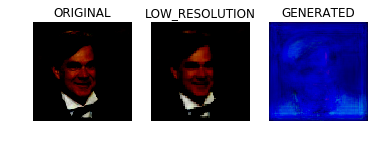

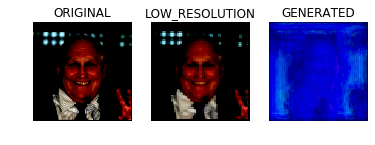

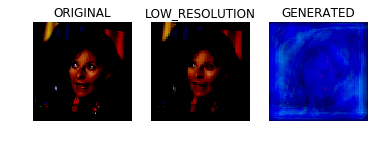

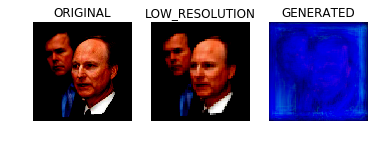

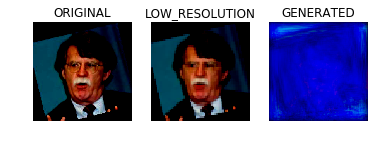

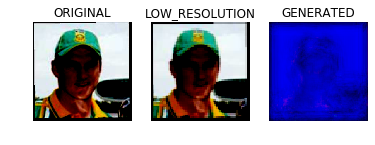

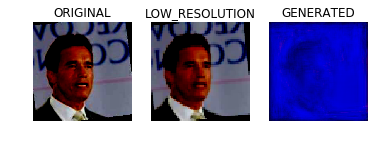

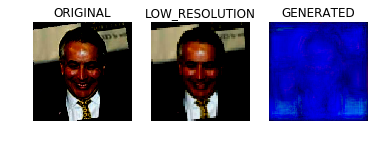

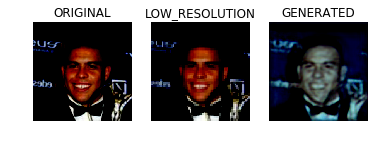

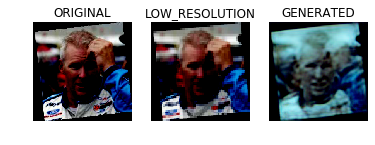

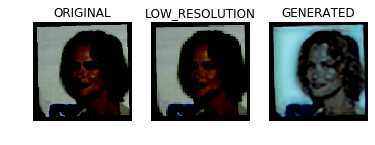

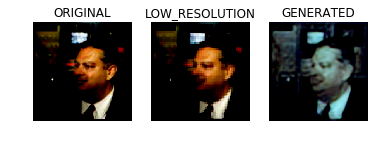

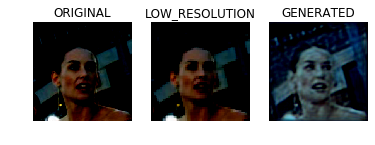

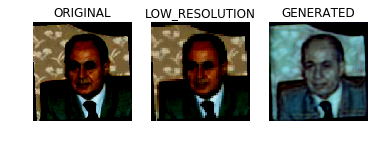

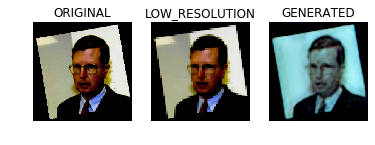

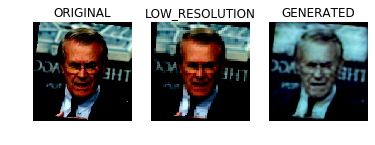

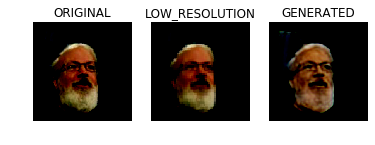

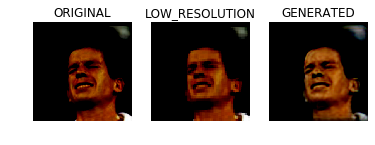

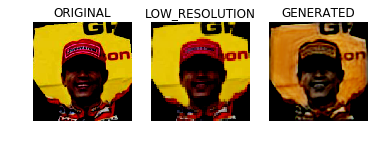

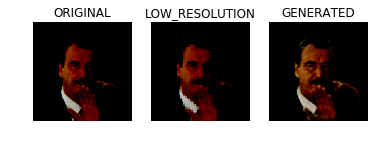

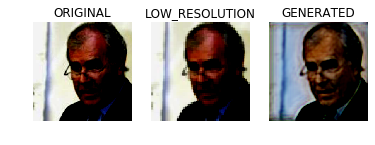

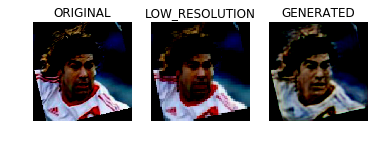

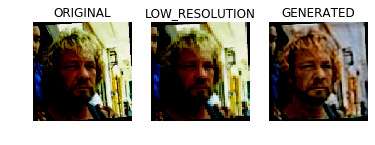

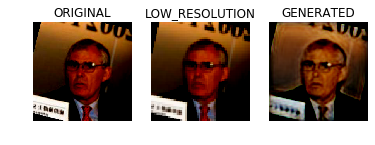

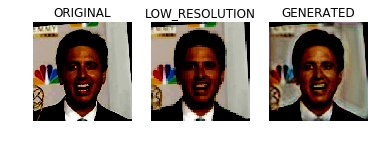

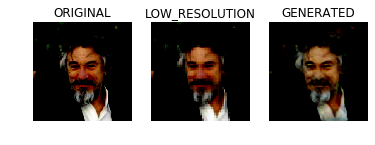

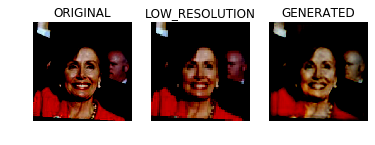

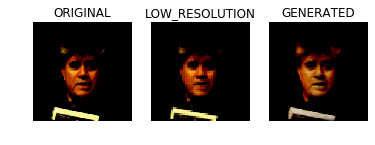

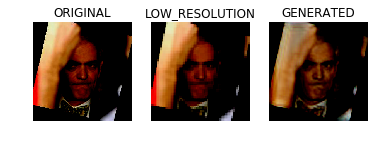

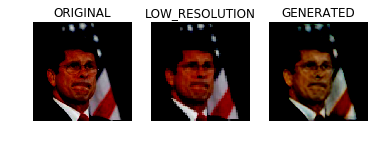

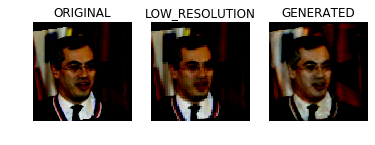

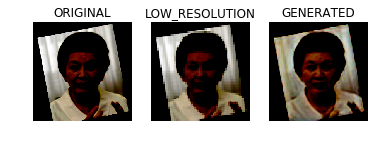

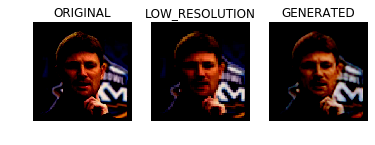

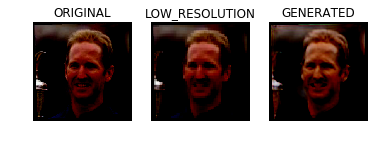

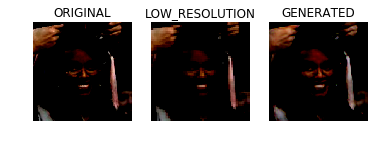

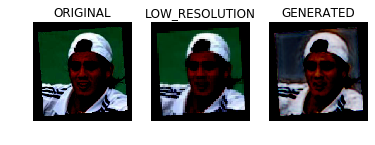

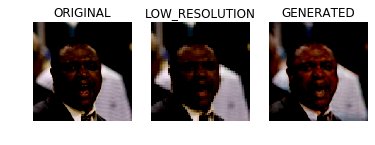

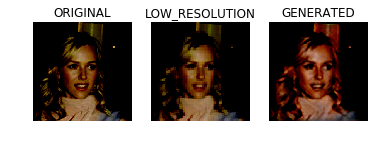

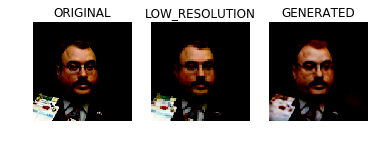

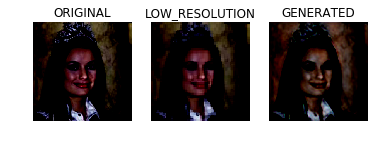

In [0]:
for epoch in range(epochs):
    # обучаем дискриминатор
    d_history = []
    g_history = []
    print("Epoch:{}".format(epoch))
    
    # сэмплируем батч с изображениями
    high_resolution_images, low_resolution_images = sample_images(data_dir=data_dir, batch_size=batch_size,
                                                                          low_resolution_shape=low_resolution_shape,
                                                                          high_resolution_shape=high_resolution_shape)
    
    # нормализуем изображения
    high_resolution_images = high_resolution_images / 127.5 - 1.
    low_resolution_images = low_resolution_images / 127.5 - 1.
    
    # сгенерируем high-resolution изображения из low-resolution изображений
    generated_high_resolution_images = generator.predict(low_resolution_images)
    
    # сгенерируем батч настоящих и поддельных меток
    real_labels = np.ones((batch_size, 16, 16, 1))
    fake_labels = np.zeros((batch_size, 16, 16, 1))
    
    # обучим дискриминатор на настоящих и поддельных изображениях
    d_loss_real = discriminator.train_on_batch(high_resolution_images, real_labels)
    d_loss_real =  np.mean(d_loss_real)
    d_loss_fake = discriminator.train_on_batch(generated_high_resolution_images, fake_labels)
    d_loss_fake =  np.mean(d_loss_fake)
    # посчитаем общий loss дискриминатора как среднее арифметическое потерь на настоящих и на поддельных метках
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    d_history.append(d_loss)
    print("D_loss:", d_loss)
    
    
    # обучаем генератор
    
    # сэмплируем батч с изображениями
    high_resolution_images, low_resolution_images = sample_images(data_dir=data_dir, batch_size=batch_size,
                                                                    low_resolution_shape=low_resolution_shape,
                                                                    high_resolution_shape=high_resolution_shape)
    
    #  нормализуем изображения
    high_resolution_images = high_resolution_images / 127.5 - 1.
    low_resolution_images = low_resolution_images / 127.5 - 1.
    
    # извлечём feature maps для настоящих high-resolution изображений
    image_features = vgg.predict(high_resolution_images)
    
    # обучим генератор
    g_loss = adversarial_model.train_on_batch([low_resolution_images, high_resolution_images],
                                             [real_labels, image_features])
    g_history.append( 0.5 * (g_loss[1]) )
    print( "G_loss:", 0.5 * (g_loss[1]) )
    
    # сохраним и выведем сэмплы изображений после каждых 5 эпох
    if epoch % 20 == 0:
        high_resolution_images, low_resolution_images = sample_images(data_dir=data_dir, batch_size=batch_size,
                                                                        low_resolution_shape=low_resolution_shape,
                                                                        high_resolution_shape=high_resolution_shape)
        
        # нормализуем изображения
        high_resolution_images = high_resolution_images / 127.5 - 1.
        low_resolution_images = low_resolution_images / 127.5 - 1.

        generated_images = generator.predict_on_batch(low_resolution_images)

        for index, img in enumerate(generated_images):
            save_images(low_resolution_images[index], high_resolution_images[index], img,
                        path="/kaggle/working/img_{}_{}".format(epoch, index))


#### Промежуточная валидация результатов

Посмотрим глазами на эти тройки изображений:
ORIGINAL -- LOW RESOLUTION -- GENERATED

Провалидируем результат, для того чтобы понять, нужно ли продолжать обучение ещё некоторое количество эпох.
Если сгенерились хорошие картинки, то можно прекращать.

Epoch:0
D_loss: 0.38725659251213074
G_loss: 0.2957105040550232
Epoch:1
D_loss: 0.3875528573989868
G_loss: 0.2961369454860687
Epoch:2
D_loss: 0.387929767370224
G_loss: 0.2946956157684326
Epoch:3
D_loss: 0.3891427516937256
G_loss: 0.29910004138946533
Epoch:4
D_loss: 0.39185333251953125
G_loss: 0.296792209148407
Epoch:5
D_loss: 0.3859802782535553
G_loss: 0.29669836163520813
Epoch:6
D_loss: 0.38649654388427734
G_loss: 0.29983580112457275
Epoch:7
D_loss: 0.3920159935951233
G_loss: 0.2927538752555847
Epoch:8
D_loss: 0.3891044557094574
G_loss: 0.29074445366859436
Epoch:9
D_loss: 0.38884568214416504
G_loss: 0.2939103841781616
Epoch:10
D_loss: 0.3844946622848511
G_loss: 0.2958470582962036
Epoch:11
D_loss: 0.38973718881607056
G_loss: 0.29684728384017944
Epoch:12
D_loss: 0.3873977065086365
G_loss: 0.2969239354133606
Epoch:13
D_loss: 0.3887087404727936
G_loss: 0.2944689095020294
Epoch:14
D_loss: 0.3894466459751129
G_loss: 0.29372772574424744
Epoch:15
D_loss: 0.39270952343940735
G_loss: 0.299058318

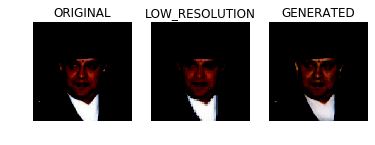

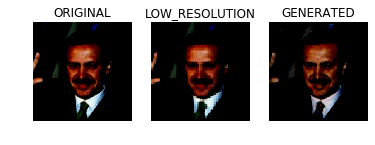

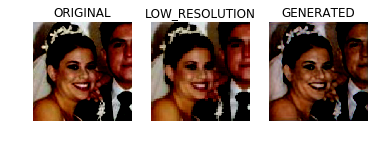

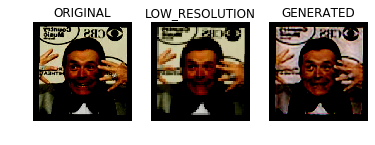

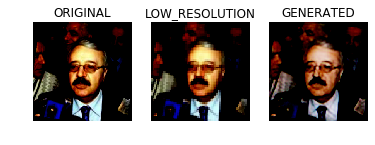

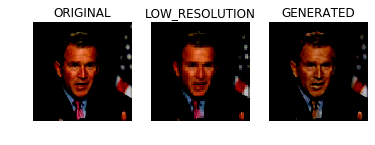

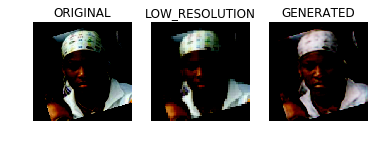

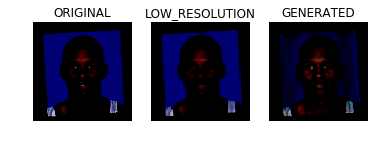

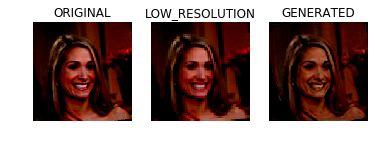

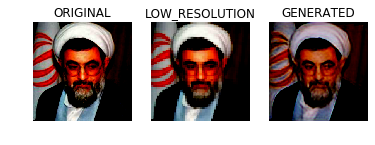

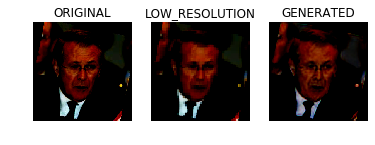

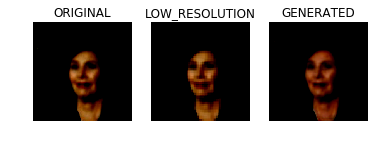

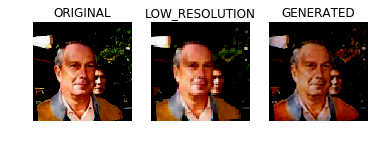

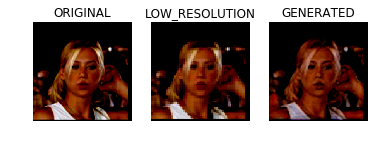

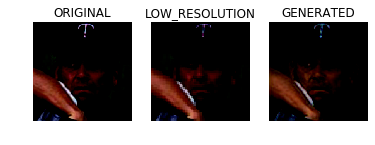

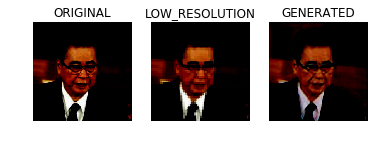

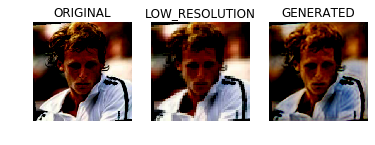

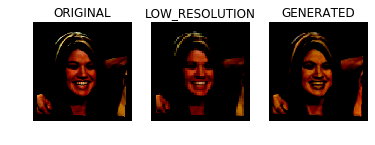

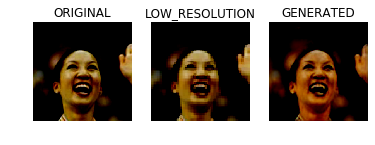

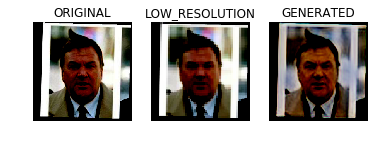

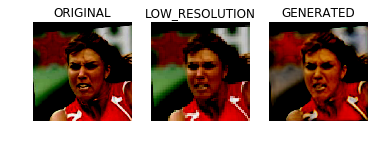

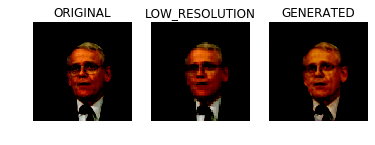

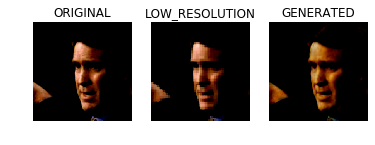

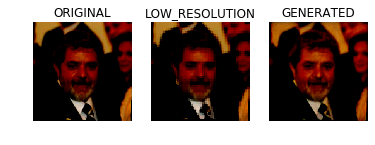

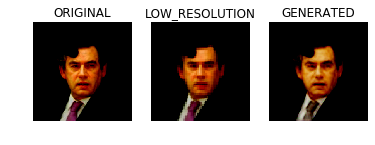

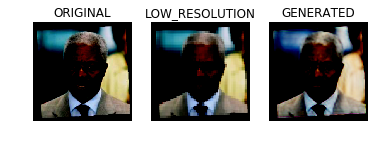

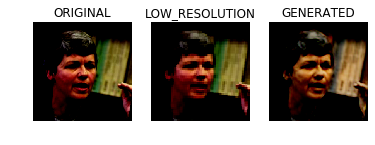

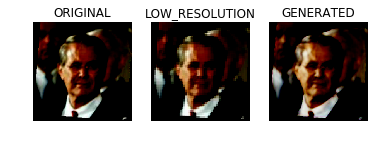

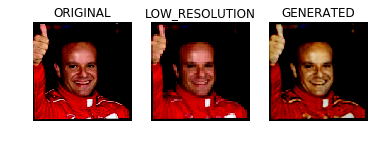

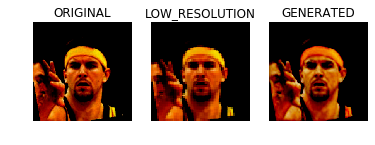

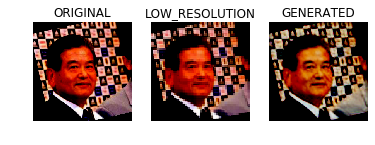

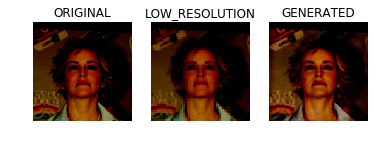

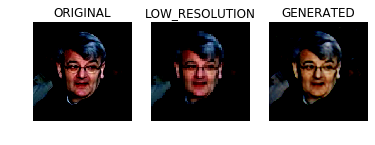

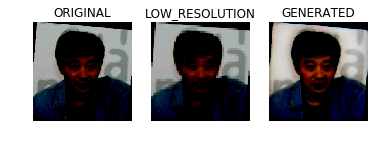

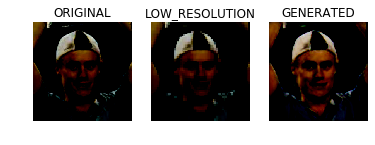

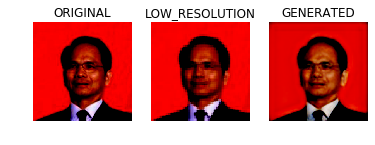

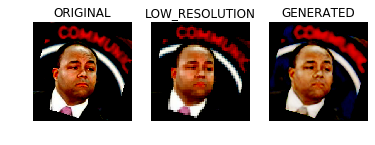

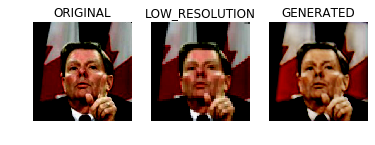

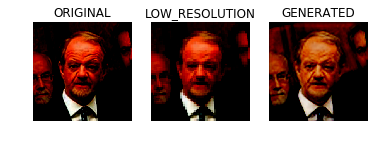

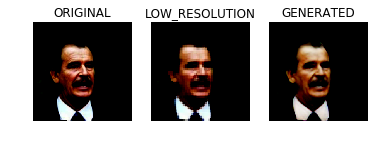

In [0]:
for epoch in range(epochs):
    # обучаем дискриминатор
    d_history = []
    g_history = []
    print("Epoch:{}".format(epoch))
    
    # сэмплируем батч с изображениями
    high_resolution_images, low_resolution_images = sample_images(data_dir=data_dir, batch_size=batch_size,
                                                                          low_resolution_shape=low_resolution_shape,
                                                                          high_resolution_shape=high_resolution_shape)
    
    # нормализуем изображения
    high_resolution_images = high_resolution_images / 127.5 - 1.
    low_resolution_images = low_resolution_images / 127.5 - 1.
    
    # сгенерируем high-resolution изображения из low-resolution изображений
    generated_high_resolution_images = generator.predict(low_resolution_images)
    
    # сгенерируем батч настоящих и поддельных меток
    real_labels = np.ones((batch_size, 16, 16, 1))
    fake_labels = np.zeros((batch_size, 16, 16, 1))
    
    # обучим дискриминатор на настоящих и поддельных изображениях
    d_loss_real = discriminator.train_on_batch(high_resolution_images, real_labels)
    d_loss_real =  np.mean(d_loss_real)
    d_loss_fake = discriminator.train_on_batch(generated_high_resolution_images, fake_labels)
    d_loss_fake =  np.mean(d_loss_fake)
    # посчитаем общий loss дискриминатора как среднее арифметическое потерь на настоящих и на поддельных метках
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
    d_history.append(d_loss)
    print("D_loss:", d_loss)
    
    
    # обучаем генератор
    
    # сэмплируем батч с изображениями
    high_resolution_images, low_resolution_images = sample_images(data_dir=data_dir, batch_size=batch_size,
                                                                    low_resolution_shape=low_resolution_shape,
                                                                    high_resolution_shape=high_resolution_shape)
    
    #  нормализуем изображения
    high_resolution_images = high_resolution_images / 127.5 - 1.
    low_resolution_images = low_resolution_images / 127.5 - 1.
    
    # извлечём feature maps для настоящих high-resolution изображений
    image_features = vgg.predict(high_resolution_images)
    
    # обучим генератор
    g_loss = adversarial_model.train_on_batch([low_resolution_images, high_resolution_images],
                                             [real_labels, image_features])
    g_history.append( 0.5 * (g_loss[1]) )
    print( "G_loss:", 0.5 * (g_loss[1]) )
    
    # сохраним и выведем сэмплы изображений после каждых 10 эпох
    if epoch % 20 == 0:
        high_resolution_images, low_resolution_images = sample_images(data_dir=data_dir, batch_size=batch_size,
                                                                        low_resolution_shape=low_resolution_shape,
                                                                        high_resolution_shape=high_resolution_shape)
        
        # нормализуем изображения
        high_resolution_images = high_resolution_images / 127.5 - 1.
        low_resolution_images = low_resolution_images / 127.5 - 1.

        generated_images = generator.predict_on_batch(low_resolution_images)

        for index, img in enumerate(generated_images):
            save_images(low_resolution_images[index], high_resolution_images[index], img,
                        path="/kaggle/working/img_{}_{}".format(epoch, index))

## Save models weights

* Сохраним веса моделей

In [0]:
generator.save_weights("/kaggle/working/generator.h5")
discriminator.save_weights("/kaggle/working/discriminator.h5")

# Eval mode

* Режим предсказания

In [0]:
#discriminator = build_discriminator()
#generator = build_generator()

generator.load_weights("/kaggle/working/generator.h5")
discriminator.load_weights("/kaggle/working/discriminator.h5")

high_resolution_images, low_resolution_images = sample_images(data_dir=data_dir, batch_size=10,
                                                                      low_resolution_shape=low_resolution_shape,
                                                                      high_resolution_shape=high_resolution_shape)

high_resolution_images = high_resolution_images / 127.5 - 1.
low_resolution_images = low_resolution_images / 127.5 - 1.

generated_images = generator.predict_on_batch(low_resolution_images)

## Save images

* Сохраняем изображения

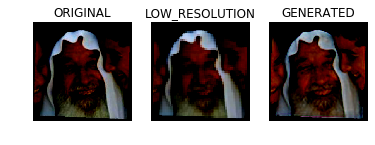

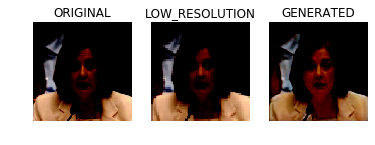

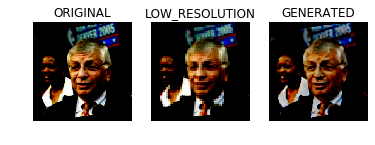

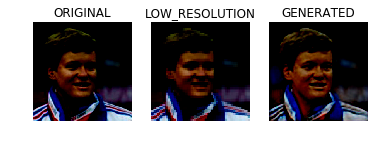

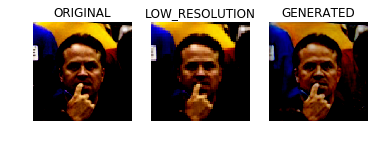

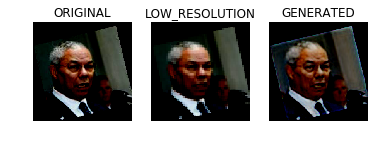

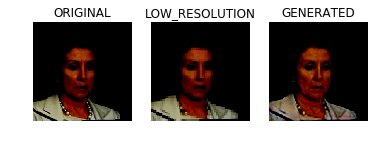

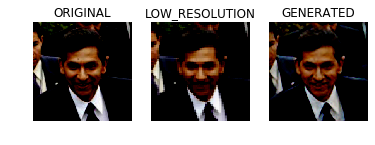

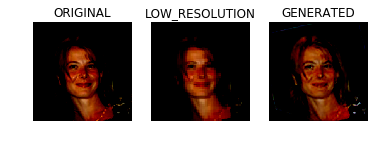

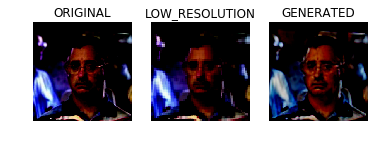

In [0]:
for index, img in enumerate(generated_images):
    save_images(low_resolution_images[index], high_resolution_images[index], img,
                path="/kaggle/working/gen_{}".format(index))